In [2]:
%pip install TA-Lib


# %%
# ‡∏ô‡∏≥‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏•‡∏ö‡∏£‡∏≤‡∏£‡∏µ‡∏ó‡∏µ‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ‡∏≠‡πà‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å Excel ‡πÅ‡∏ó‡∏ô yfinance
file_path = 'Agriculture and food industry_5y_data.xlsx'  # üîÅ ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ä‡∏∑‡πà‡∏≠‡πÑ‡∏ü‡∏•‡πå‡∏ï‡∏≤‡∏°‡∏Ç‡∏≠‡∏á‡∏à‡∏£‡∏¥‡∏á
df = pd.read_excel(file_path)

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'Date' ‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô index ‡∏´‡∏£‡∏∑‡∏≠‡πÄ‡∏õ‡∏•‡πà‡∏≤
if df.index.name == 'Date':
    df = df.reset_index()

# ‡∏Å‡∏£‡∏≠‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡πÉ‡∏´‡πâ‡∏°‡∏µ‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£ (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤‡∏ô‡∏µ‡πâ‡πÉ‡∏ô‡πÑ‡∏ü‡∏•‡πå)
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# ‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå Date ‡πÉ‡∏´‡πâ‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô‡∏£‡∏π‡∏õ datetime (‡∏ñ‡πâ‡∏≤‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÅ‡∏õ‡∏•‡∏á)
df['Date'] = pd.to_datetime(df['Date'])

# ‡∏î‡∏π‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
print(df.head())


# %%
import pandas as pd
import talib as ta

# 1. ‡∏≠‡πà‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏ó‡∏∏‡∏Å‡∏ä‡∏µ‡∏ï‡πÉ‡∏ô‡πÑ‡∏ü‡∏•‡πå Excel
file_path = 'Agriculture and food industry_5y_data.xlsx'
sheets_dict = pd.read_excel(file_path, sheet_name=None)

period = 14
processed_dict = {}

def rsi_signal(rsi):
    if rsi >= 70:
        return "SELL"
    elif rsi <= 30:
        return "BUY"
    else:
        return ""

def signal_to_binary(signal):
    if signal == "BUY":
        return 1
    else:
        return 0

for sheet_name, df in sheets_dict.items():
    if df.index.name == 'Date':
        df = df.reset_index()

    df['Date'] = pd.to_datetime(df['Date'])
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

    df['EMA25'] = ta.EMA(df['Close'], timeperiod=25)
    df['EMA75'] = ta.EMA(df['Close'], timeperiod=75)
    df['EMA200'] = ta.EMA(df['Close'], timeperiod=200)
    df['RSI'] = ta.RSI(df['Close'], timeperiod=period)

    macd, macdsignal, macdhist = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_signal'] = macdsignal
    df['MACD_hist'] = macdhist

    df['Change'] = df['Close'].diff()
    df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)
    df['Loss'] = df['Change'].apply(lambda x: -x if x < 0 else 0)

    df['Avg Gain'] = df['Gain'].rolling(window=period).mean()
    df['Avg Loss'] = df['Loss'].rolling(window=period).mean()

    df['RS'] = df.apply(lambda row: row['Avg Gain'] / row['Avg Loss'] if row['Avg Loss'] != 0 else 100, axis=1)

    df['RSI Signal'] = df['RSI'].apply(rsi_signal)

    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå status ‡πÅ‡∏ö‡∏ö binary target
    df['status'] = df['RSI Signal'].apply(signal_to_binary)

    processed_dict[sheet_name] = df

    # ‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡πà‡∏≤ unique ‡∏Ç‡∏≠‡∏á status ‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ä‡∏µ‡∏ï
    print(f"Sheet: {sheet_name} ‚Äî unique values in status: {df['status'].unique()}")

# Export ‡∏ó‡∏∏‡∏Å‡∏ä‡∏µ‡∏ï‡∏Å‡∏•‡∏±‡∏ö‡πÑ‡∏õ‡∏¢‡∏±‡∏á Excel
#output_path = '‡∏´‡∏∏‡πâ‡∏ô_processed.xlsx'
#with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    #for sheet, df in processed_dict.items():
       # df.to_excel(writer, sheet_name=sheet, index=False)





Note: you may need to restart the kernel to use updated packages.
        Date      Open      High       Low     Close     Volume
0 2022-11-01  6.584078  7.500848  6.084021  7.417505  932827900
1 2022-11-02  7.084134  7.459176  6.417392  6.542406  410476300
2 2022-11-03  6.542406  6.917449  6.417392  6.834106  145654900
3 2022-11-04  6.792434  7.000791  6.500735  6.542406  119765500
4 2022-11-07  6.625749  6.625749  6.125693  6.167364   88102200
Sheet: AAI.bk ‚Äî unique values in status: [0 1]
Sheet: APURE.bk ‚Äî unique values in status: [0 1]
Sheet: ASIAN.bk ‚Äî unique values in status: [0 1]
Sheet: BR.bk ‚Äî unique values in status: [0 1]
Sheet: BRR.bk ‚Äî unique values in status: [0 1]
Sheet: BTG.bk ‚Äî unique values in status: [0 1]
Sheet: CBG.bk ‚Äî unique values in status: [0 1]
Sheet: CFRESH.bk ‚Äî unique values in status: [0 1]
Sheet: CH.bk ‚Äî unique values in status: [0 1]
Sheet: CHAO.bk ‚Äî unique values in status: [0 1]
Sheet: CHOTI.bk ‚Äî unique values in status: [0 1]
She

In [7]:
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns

# ‡∏≠‡πà‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å Excel
file_path = '‡∏´‡∏∏‡πâ‡∏ô_processed.xlsx'

def read_excel_file(file_path):
    df = pd.read_excel(file_path)
    return df

#df = read_excel_file(file_path)

In [8]:
file_path

'‡∏´‡∏∏‡πâ‡∏ô_processed.xlsx'

In [9]:
df

Date      Open      High       Low     Close  Volume     EMA25  \
0    2020-06-15  8.531926  8.755274  8.353247  8.353247  739400       NaN   
1    2020-06-16  8.531927  8.665936  8.442587  8.442587  379800       NaN   
2    2020-06-17  8.442586  8.665934  8.442586  8.621264  213700       NaN   
3    2020-06-18  8.665936  8.755275  8.531927  8.665936  242200       NaN   
4    2020-06-19  8.621264  8.710604  8.531925  8.531925  146300       NaN   
...         ...       ...       ...       ...       ...     ...       ...   
1203 2025-06-09  5.250000  5.300000  5.250000  5.300000  608700  5.649302   
1204 2025-06-10  5.300000  5.300000  5.200000  5.250000   14600  5.618587   
1205 2025-06-11  5.200000  5.250000  5.200000  5.250000    1600  5.590234   
1206 2025-06-12  5.200000  5.350000  5.150000  5.200000   50200  5.560216   
1207 2025-06-13  5.200000  5.200000  5.150000  5.200000   27100  5.532507   

         EMA75    EMA200        RSI  ...  MACD_signal  MACD_hist    Change  \
0          NaN       NaN        NaN  ...          NaN        NaN       NaN   
1          NaN       NaN        NaN  ...          NaN        NaN  0.089340   
2          NaN       NaN        NaN  ...          NaN        NaN  0.178678   
3          NaN       NaN        NaN  ...          NaN        NaN  0.044671   
4          NaN       NaN        NaN  ...          NaN        NaN -0.134010   
...        ...       ...        ...  ...          ...        ...       ...   
1203  6.046084  6.569287  35.047583  ...    -0.190911  -0.008817  0.000000   
1204  6.025134  6.556159  33.698479  ...    -0.193095  -0.008736 -0.050000   
1205  6.004736  6.543163  33.698479  ...    -0.194712  -0.006466  0.000000   
1206  5.983559  6.529798  32.258358  ...    -0.196242  -0.006121 -0.050000   
1207  5.962939  6.516566  32.258358  ...    -0.197190  -0.003794  0.000000   

          Gain     Loss  Avg Gain  Avg Loss        RS  RSI Signal status  
0     0.000000  0.00000       NaN       NaN       NaN                  0  
1     0.089340  0.00000       NaN       NaN       NaN                  0  
2     0.178678  0.00000       NaN       NaN       NaN                  0  
3     0.044671  0.00000       NaN       NaN       NaN                  0  
4     0.000000  0.13401       NaN       NaN       NaN                  0  
...        ...      ...       ...       ...       ...         ...    ...  
1203  0.000000  0.00000  0.032143  0.078571  0.409091                  0  
1204  0.000000  0.05000  0.025000  0.082143  0.304348                  0  
1205  0.000000  0.00000  0.025000  0.053571  0.466667                  0  
1206  0.000000  0.05000  0.025000  0.053571  0.466667                  0  
1207  0.000000  0.00000  0.025000  0.042857  0.583333                  0  

[1208 rows x 21 columns]

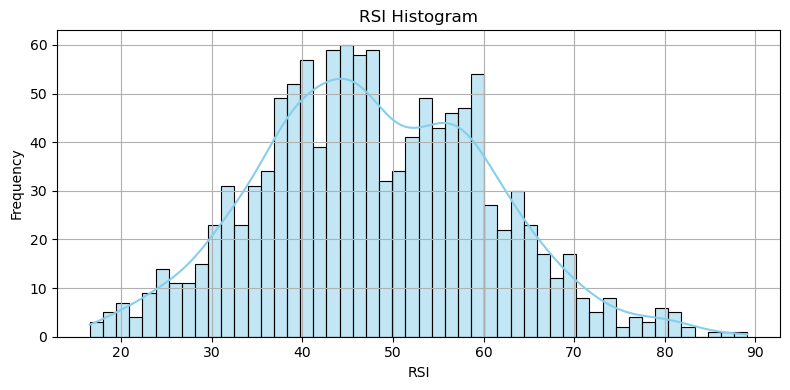

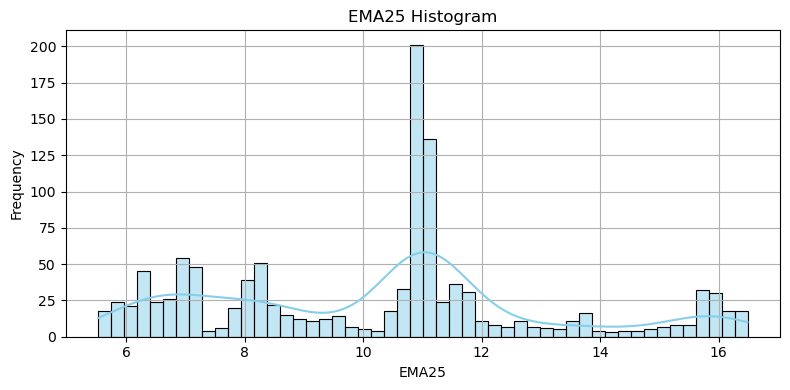

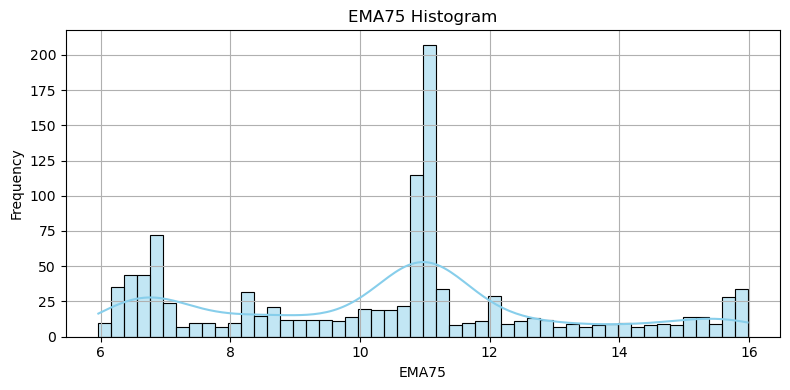

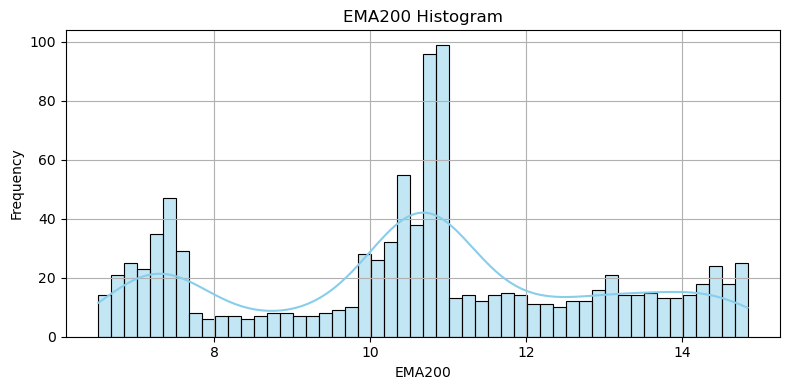

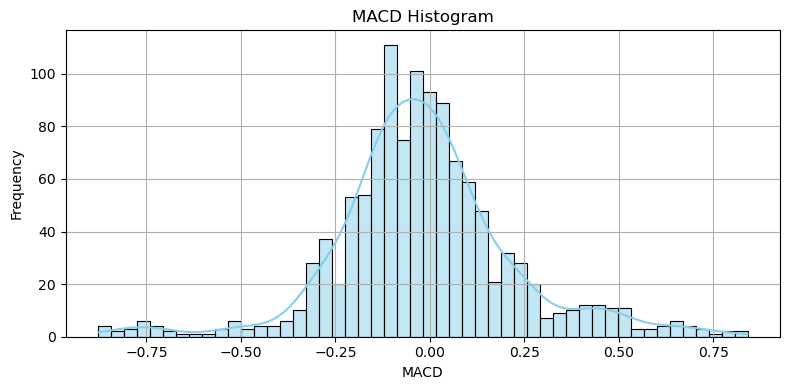

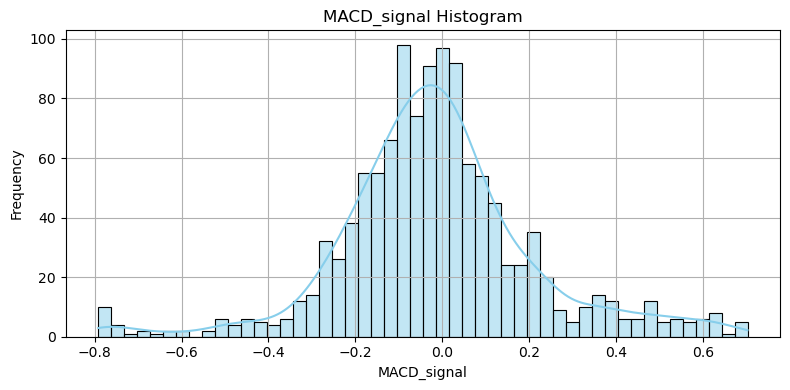

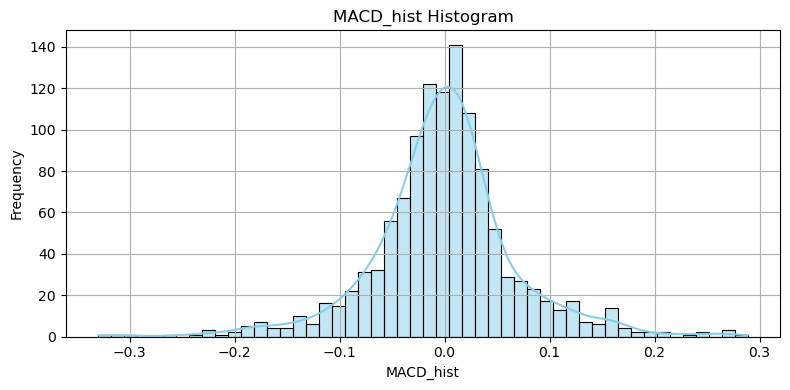

In [10]:

# ‡∏™‡∏£‡πâ‡∏≤‡∏á Histogram ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏≠‡∏¥‡∏ô‡∏î‡∏¥‡πÄ‡∏Ñ‡πÄ‡∏ï‡∏≠‡∏£‡πå
indicators = ['RSI', 'EMA25', 'EMA75', 'EMA200', 'MACD', 'MACD_signal', 'MACD_hist']

for indicator in indicators:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[indicator].dropna(), bins=50, kde=True, color='skyblue')
    plt.title(f'{indicator} Histogram')
    plt.xlabel(indicator)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

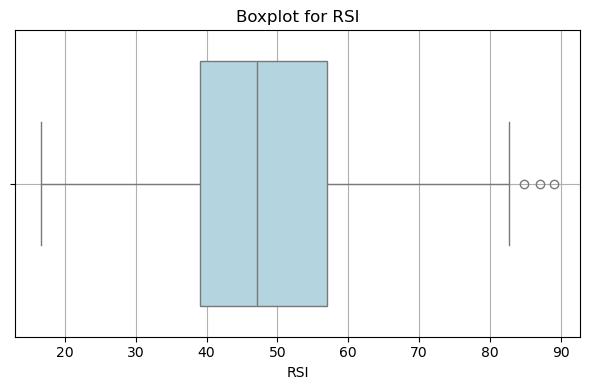

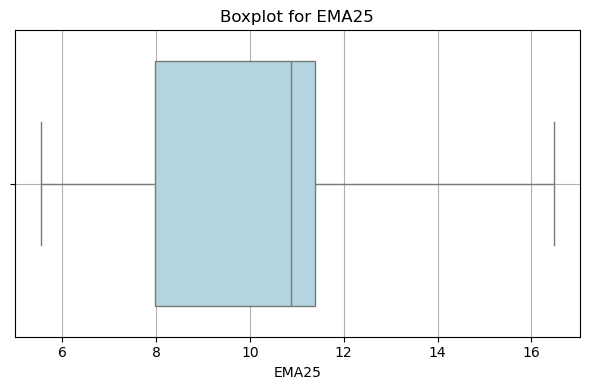

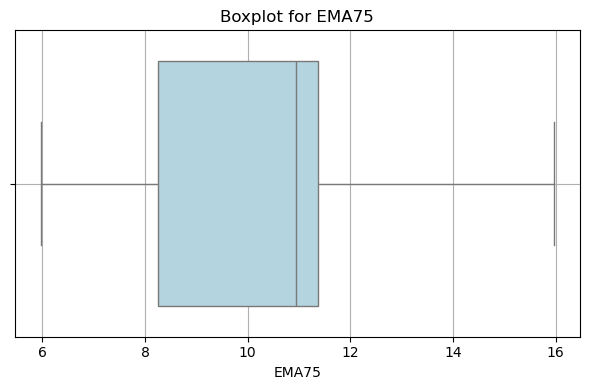

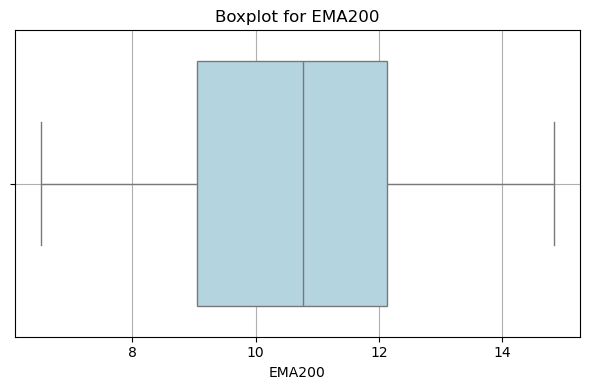

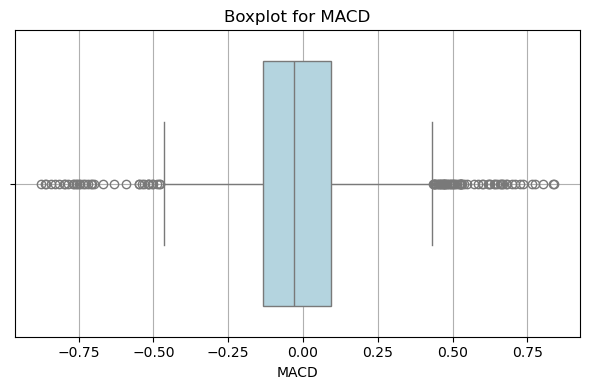

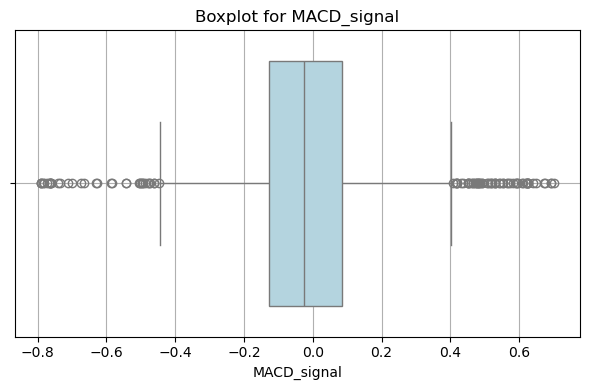

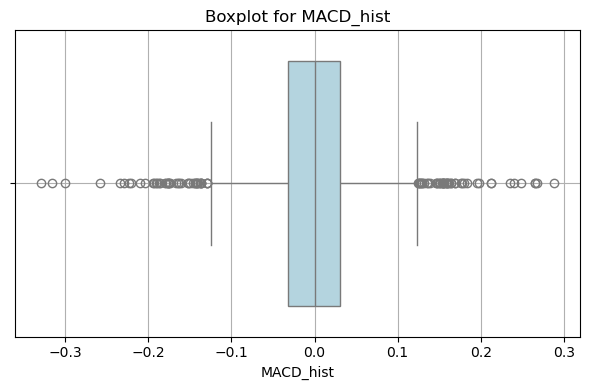

In [11]:
# ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å Indicator ‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö
indicators = ['RSI', 'EMA25', 'EMA75', 'EMA200', 'MACD', 'MACD_signal', 'MACD_hist']

# ‡∏™‡∏£‡πâ‡∏≤‡∏á Boxplot ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞ Indicator
for indicator in indicators:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[indicator], color='lightblue')
    plt.title(f'Boxplot for {indicator}')
    plt.xlabel(indicator)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [12]:
def detect_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]

outliers_rsi = detect_outliers(df['RSI'])
print("RSI Outliers:")
print(outliers_rsi)


RSI Outliers:
521     87.048362
522     89.083772
1028    84.810265
Name: RSI, dtype: float64


In [13]:
# ‡πÅ‡∏™‡∏î‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà RSI ‡πÄ‡∏õ‡πá‡∏ô outlier
df.loc[372]


Date           2021-12-30 00:00:00
Open                     10.984371
High                     11.170547
Low                      10.798195
Close                    11.170547
Volume                        4400
EMA25                    11.065823
EMA75                    11.029849
EMA200                   10.769791
RSI                      53.969377
MACD                      0.033507
MACD_signal                0.01728
MACD_hist                 0.016227
Change                         0.0
Gain                           0.0
Loss                           0.0
Avg Gain                  0.053193
Avg Loss                  0.053193
RS                             1.0
RSI Signal                        
status                           0
Name: 372, dtype: object

In [14]:
import pandas as pd

# ‡∏™‡∏°‡∏°‡∏ï‡∏¥ df ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì

indicators = ['RSI', 'MACD', 'EMA25']  # ‡πÉ‡∏™‡πà‡∏ä‡∏∑‡πà‡∏≠ Indicator ‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö

outlier_summary = pd.DataFrame()  # ‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏™‡∏£‡∏∏‡∏õ

for ind in indicators:
    Q1 = df[ind].quantile(0.25)
    Q3 = df[ind].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô outlier ‡∏Ç‡∏≠‡∏á Indicator ‡∏ô‡∏µ‡πâ
    outliers = df[(df[ind] < lower_bound) | (df[ind] > upper_bound)].copy()
    outliers['Indicator'] = ind  # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ä‡∏∑‡πà‡∏≠ Indicator ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ö‡∏≠‡∏Å‡∏ß‡πà‡∏≤‡∏≠‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏Ñ‡∏∑‡∏≠ outlier ‡∏Ç‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡πÑ‡∏´‡∏ô
    
    # ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏ó‡∏µ‡πà‡∏à‡∏∞‡πÄ‡∏Å‡πá‡∏ö‡πÑ‡∏ß‡πâ (‡πÅ‡∏Å‡πâ‡∏ï‡∏≤‡∏°‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°)
    cols = ['Date', 'Open', 'High', 'Low', 'Close', ind, 'Indicator']
    outliers = outliers[cols]
    
    # ‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• outlier ‡∏ó‡∏∏‡∏Å indicator ‡πÄ‡∏Ç‡πâ‡∏≤‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏±‡∏ô
    outlier_summary = pd.concat([outlier_summary, outliers])

# ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏™‡∏£‡∏∏‡∏õ outlier ‡∏Ç‡∏≠‡∏á‡∏ó‡∏∏‡∏Å Indicator
print(outlier_summary)


           Date       Open       High        Low      Close        RSI  \
521  2022-08-17  12.380689  13.218480  12.380689  13.218480  87.048362   
522  2022-08-18  12.939216  13.683919  12.846128  13.683919  89.083772   
1028 2024-09-16   7.055906   7.591181   7.055906   7.591181  84.810265   
103  2020-11-17  10.228384  10.685009  10.137060  10.593684        NaN   
104  2020-11-18  10.867658  11.872231  10.502359  11.689582        NaN   
...         ...        ...        ...        ...        ...        ...   
817  2023-11-01   9.165489   9.588511   9.165489   9.400501        NaN   
818  2023-11-02   9.400500   9.494505   9.259493   9.306495        NaN   
1032 2024-09-20   7.445197   7.493858   7.396535   7.493858        NaN   
1033 2024-09-23   7.493858   7.639842   7.493858   7.542520        NaN   
1034 2024-09-24   7.542520   7.542520   7.493858   7.542520        NaN   

     Indicator      MACD  EMA25  
521        RSI       NaN    NaN  
522        RSI       NaN    NaN  
1028     